In [1]:
import pandas as pd
import numpy as np
from collections import Counter as c
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import pickle

In [2]:
data=pd.read_csv("kidney_disease.csv")
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [9]:
data.columns=['id','age','blood_pressure','specific_gravity','albumin',
              'sugar','red_blood_cells','pus_cell','pus_cell_clumps','bacteria',
              'blood glucose random','blood_urea','serum_creatinine','sodium','potassium',
              'hemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count',
              'hypertension','diabetesmellitus','coronary_artery_disease','appetite',
              'pedal_edema','anemia','class']
data.columns              

Index(['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood glucose random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetesmellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      400 non-null    float64
 2   blood_pressure           400 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  400 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          400 non-null    object 
 7   pus_cell                 400 non-null    object 
 8   pus_cell_clumps          400 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood glucose random     400 non-null    float64
 11  blood_urea               400 non-null    float64
 12  serum_creatinine         400 non-null    float64
 13  sodium                   400 non-null    float64
 14  potassium                4

In [11]:
data.isnull().any()

id                         False
age                        False
blood_pressure             False
specific_gravity            True
albumin                    False
sugar                       True
red_blood_cells            False
pus_cell                   False
pus_cell_clumps            False
bacteria                    True
blood glucose random       False
blood_urea                 False
serum_creatinine           False
sodium                     False
potassium                  False
hemoglobin                 False
packed_cell_volume         False
white_blood_cell_count      True
red_blood_cell_count       False
hypertension               False
diabetesmellitus            True
coronary_artery_disease    False
appetite                   False
pedal_edema                 True
anemia                      True
class                      False
dtype: bool

In [7]:
data['blood glucose random'].fillna(data['blood glucose random'].mean(),inplace=True)
data['blood_pressure'].fillna(data['blood_pressure'].mean(),inplace=True)
data['blood_urea'].fillna(data['blood_urea'].mean(),inplace=True)
data['hemoglobin'].fillna(data['hemoglobin'].mean(),inplace=True)
data['packed_cell_volume'].fillna(data['packed_cell_volume'].mean(),inplace=True)
data['potassium'].fillna(data['potassium'].mean(),inplace=True)
data['red_blood_cell_count'].fillna(data['red_blood_cell_count'].mean(),inplace=True)
data['serum_creatinine'].fillna(data['serum_creatinine'].mean(),inplace=True)
data['sodium'].fillna(data['sodium'].mean(),inplace=True)

In [14]:
data['age'].fillna(data['age'].mode()[0],inplace=True)
data['hypertension'].fillna(data['hypertension'].mode()[0],inplace=True)
data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0],inplace=True)
data['appetite'].fillna(data['appetite'].mode()[0],inplace=True)
data['albumin'].fillna(data['albumin'].mode()[0],inplace=True)
data['pus_cell'].fillna(data['pus_cell'].mode()[0],inplace=True)
data['red_blood_cells'].fillna(data['red_blood_cells'].mode()[0],inplace=True)
data['coronary_artery_disease'].fillna(data['coronary_artery_disease'].mode()[0],inplace=True)
data['bacteria'].fillna(data['bacteria'].mode()[0],inplace=True)
data['anemia'].fillna(data['anemia'].mode()[0],inplace=True)
data['sugar'].fillna(data['sugar'].mode()[0],inplace=True)
data['diabetesmellitus'].fillna(data['diabetesmellitus'].mode()[0],inplace=True)
data['pedal_edema'].fillna(data['pedal_edema'].mode()[0],inplace=True)
data['specific_gravity'].fillna(data['specific_gravity'].mode()[0],inplace=True)

In [15]:
catcols=set(data.dtypes[data.dtypes=='O'].index.values)
print(catcols)

{'red_blood_cells', 'pus_cell_clumps', 'hypertension', 'diabetesmellitus', 'anemia', 'pus_cell', 'pedal_edema', 'bacteria', 'appetite', 'class', 'coronary_artery_disease', 'white_blood_cell_count'}


In [16]:
for i in catcols:
  print("Columns:",i)
  print(c(data[i]))
  print('*'*120+'\n')

Columns: red_blood_cells
Counter({'normal': 353, 'abnormal': 47})
************************************************************************************************************************

Columns: pus_cell_clumps
Counter({'notpresent': 358, 'present': 42})
************************************************************************************************************************

Columns: hypertension
Counter({'no': 253, 'yes': 147})
************************************************************************************************************************

Columns: diabetesmellitus
Counter({'no': 260, 'yes': 134, '\tno': 3, '\tyes': 2, ' yes': 1})
************************************************************************************************************************

Columns: anemia
Counter({'no': 340, 'yes': 60})
************************************************************************************************************************

Columns: pus_cell
Counter({'normal': 324, 'abnormal': 76})


In [17]:
#catcols.remove('red_blood_cell_count')
#catcols.remove('packed_cell_volume')
catcols.remove('white_blood_cell_count')
print(catcols)

{'red_blood_cells', 'pus_cell_clumps', 'hypertension', 'diabetesmellitus', 'anemia', 'pus_cell', 'pedal_edema', 'bacteria', 'appetite', 'class', 'coronary_artery_disease'}


In [24]:
catcols=['anemia','pedal_edema','appetite','bacteria','class','coronary_artery_disease','diabetesmellitus',
         'hypertension','pus_cell','pus_cell_clumps','red_blood_cells']

In [25]:
from sklearn.preprocessing import LabelEncoder
for i in catcols:
  print("LABEL ENCODING OF :",i)
  LEi = LabelEncoder()
  print(c(data[i]))
  data[i] = LEi.fit_transform(data[i])
  print(c(data[i]))
  print("*"*100)

LABEL ENCODING OF : anemia
Counter({0: 340, 1: 60})
Counter({0: 340, 1: 60})
****************************************************************************************************
LABEL ENCODING OF : pedal_edema
Counter({0: 324, 1: 76})
Counter({0: 324, 1: 76})
****************************************************************************************************
LABEL ENCODING OF : appetite
Counter({0: 318, 1: 82})
Counter({0: 318, 1: 82})
****************************************************************************************************
LABEL ENCODING OF : bacteria
Counter({0: 378, 1: 22})
Counter({0: 378, 1: 22})
****************************************************************************************************
LABEL ENCODING OF : class
Counter({0: 248, 2: 150, 1: 2})
Counter({0: 248, 2: 150, 1: 2})
****************************************************************************************************
LABEL ENCODING OF : coronary_artery_disease
Counter({1: 364, 2: 34, 0: 2})
Counter({1: 3

In [26]:
contcols=set(data.dtypes[data.dtypes!='O'].index.values)
print(contcols)

{'sodium', 'specific_gravity', 'anemia', 'sugar', 'hemoglobin', 'packed_cell_volume', 'id', 'blood glucose random', 'albumin', 'pus_cell', 'blood_pressure', 'red_blood_cells', 'blood_urea', 'pedal_edema', 'red_blood_cell_count', 'appetite', 'serum_creatinine', 'bacteria', 'pus_cell_clumps', 'diabetesmellitus', 'potassium', 'class', 'coronary_artery_disease', 'hypertension', 'age'}


In [29]:
for i in contcols:
  print ("Contions Columns :",i)
  print(c(data[i]))
  print("*"*120+'\n')

Contions Columns : sodium
Counter({137.52875399361022: 87, 135.0: 40, 140.0: 25, 141.0: 22, 139.0: 21, 142.0: 20, 138.0: 20, 137.0: 19, 136.0: 17, 150.0: 17, 147.0: 13, 145.0: 11, 132.0: 10, 146.0: 10, 131.0: 9, 144.0: 9, 133.0: 8, 130.0: 7, 134.0: 6, 143.0: 4, 127.0: 3, 124.0: 3, 114.0: 2, 125.0: 2, 128.0: 2, 122.0: 2, 113.0: 2, 120.0: 2, 111.0: 1, 104.0: 1, 4.5: 1, 129.0: 1, 163.0: 1, 126.0: 1, 115.0: 1})
************************************************************************************************************************

Contions Columns : specific_gravity
Counter({1.02: 153, 1.01: 84, 1.025: 81, 1.015: 75, 1.005: 7})
************************************************************************************************************************

Contions Columns : anemia
Counter({0: 340, 1: 60})
************************************************************************************************************************

Contions Columns : sugar
Counter({0.0: 339, 2.0: 18, 3.0: 14, 4.0: 13, 1.

In [30]:
contcols.remove('specific_gravity')
contcols.remove('albumin')
contcols.remove('sugar')
print(contcols)

{'sodium', 'anemia', 'hemoglobin', 'packed_cell_volume', 'id', 'blood glucose random', 'pus_cell', 'blood_pressure', 'red_blood_cells', 'blood_urea', 'pedal_edema', 'red_blood_cell_count', 'appetite', 'serum_creatinine', 'bacteria', 'pus_cell_clumps', 'diabetesmellitus', 'potassium', 'class', 'coronary_artery_disease', 'hypertension', 'age'}


In [34]:
#catcols.add('specific_gravity')
#catcols.add('albumin')
#catcols.add('sugar')
print(catcols)

['anemia', 'pedal_edema', 'appetite', 'bacteria', 'class', 'coronary_artery_disease', 'diabetesmellitus', 'hypertension', 'pus_cell', 'pus_cell_clumps', 'red_blood_cells']


In [39]:
data['coronary_artery_disease'] = data.coronary_artery_disease.replace('\tno','no')
c(data['coronary_artery_disease'])

Counter({1: 364, 2: 34, 0: 2})

In [44]:
data['diabtesmellitus'] = data.diabetesmellitus.replace(to_replace={'\tno':'no','\tyes':'yes','yes':'no'})
c(data['diabetesmellitus'])

Counter({4: 134, 3: 260, 2: 1, 0: 3, 1: 2})

In [45]:
data.describe()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,red_blood_cell_count,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class,diabtesmellitus
count,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,51.675000,76.469072,1.017712,0.90000,0.395000,0.882500,0.810000,0.105000,0.055000,...,38.884498,4.707435,0.367500,3.300000,1.080000,0.205000,0.190000,0.150000,0.755000,3.300000
std,115.614301,17.022008,13.476298,0.005434,1.31313,1.040038,0.322418,0.392792,0.306937,0.228266,...,8.151081,0.840314,0.482728,0.579517,0.289499,0.404207,0.392792,0.357519,0.968152,0.579517
min,0.000000,2.000000,50.000000,1.005000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.750000,42.000000,70.000000,1.015000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,34.000000,4.500000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,199.500000,55.000000,78.234536,1.020000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,38.884498,4.707435,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,299.250000,64.000000,80.000000,1.020000,2.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,44.000000,5.100000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,2.000000,4.000000
max,399.000000,90.000000,180.000000,1.025000,5.00000,5.000000,1.000000,1.000000,1.000000,1.000000,...,54.000000,8.000000,1.000000,4.000000,2.000000,1.000000,1.000000,1.000000,2.000000,4.000000


<ipython-input-46-868c85374ad7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.age)


<Axes: xlabel='age', ylabel='Density'>

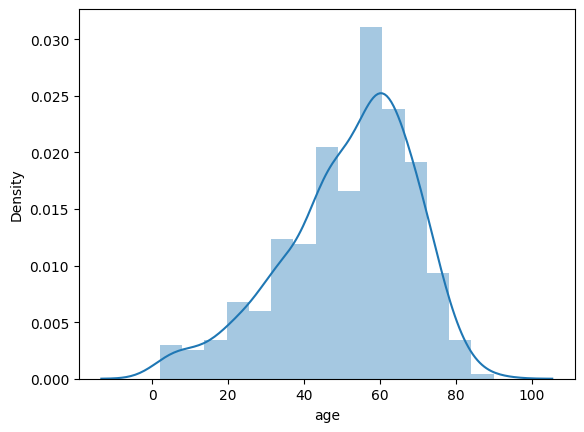

In [46]:
sns.distplot(data.age)

Text(0.5, 1.0, 'age VS blood Scatter Plot')

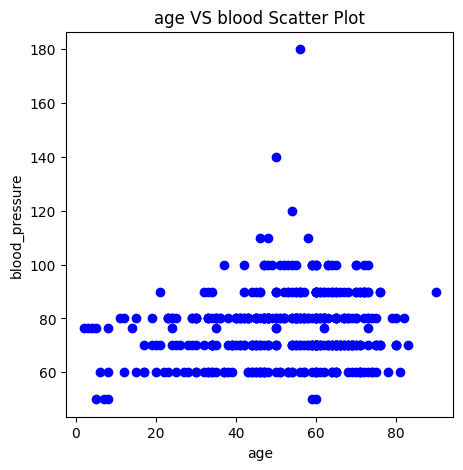

In [47]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(5,5))
plt.scatter(data['age'],data['blood_pressure'],color='blue')
plt.xlabel('age')
plt.ylabel('blood_pressure')
plt.title("age VS blood Scatter Plot")

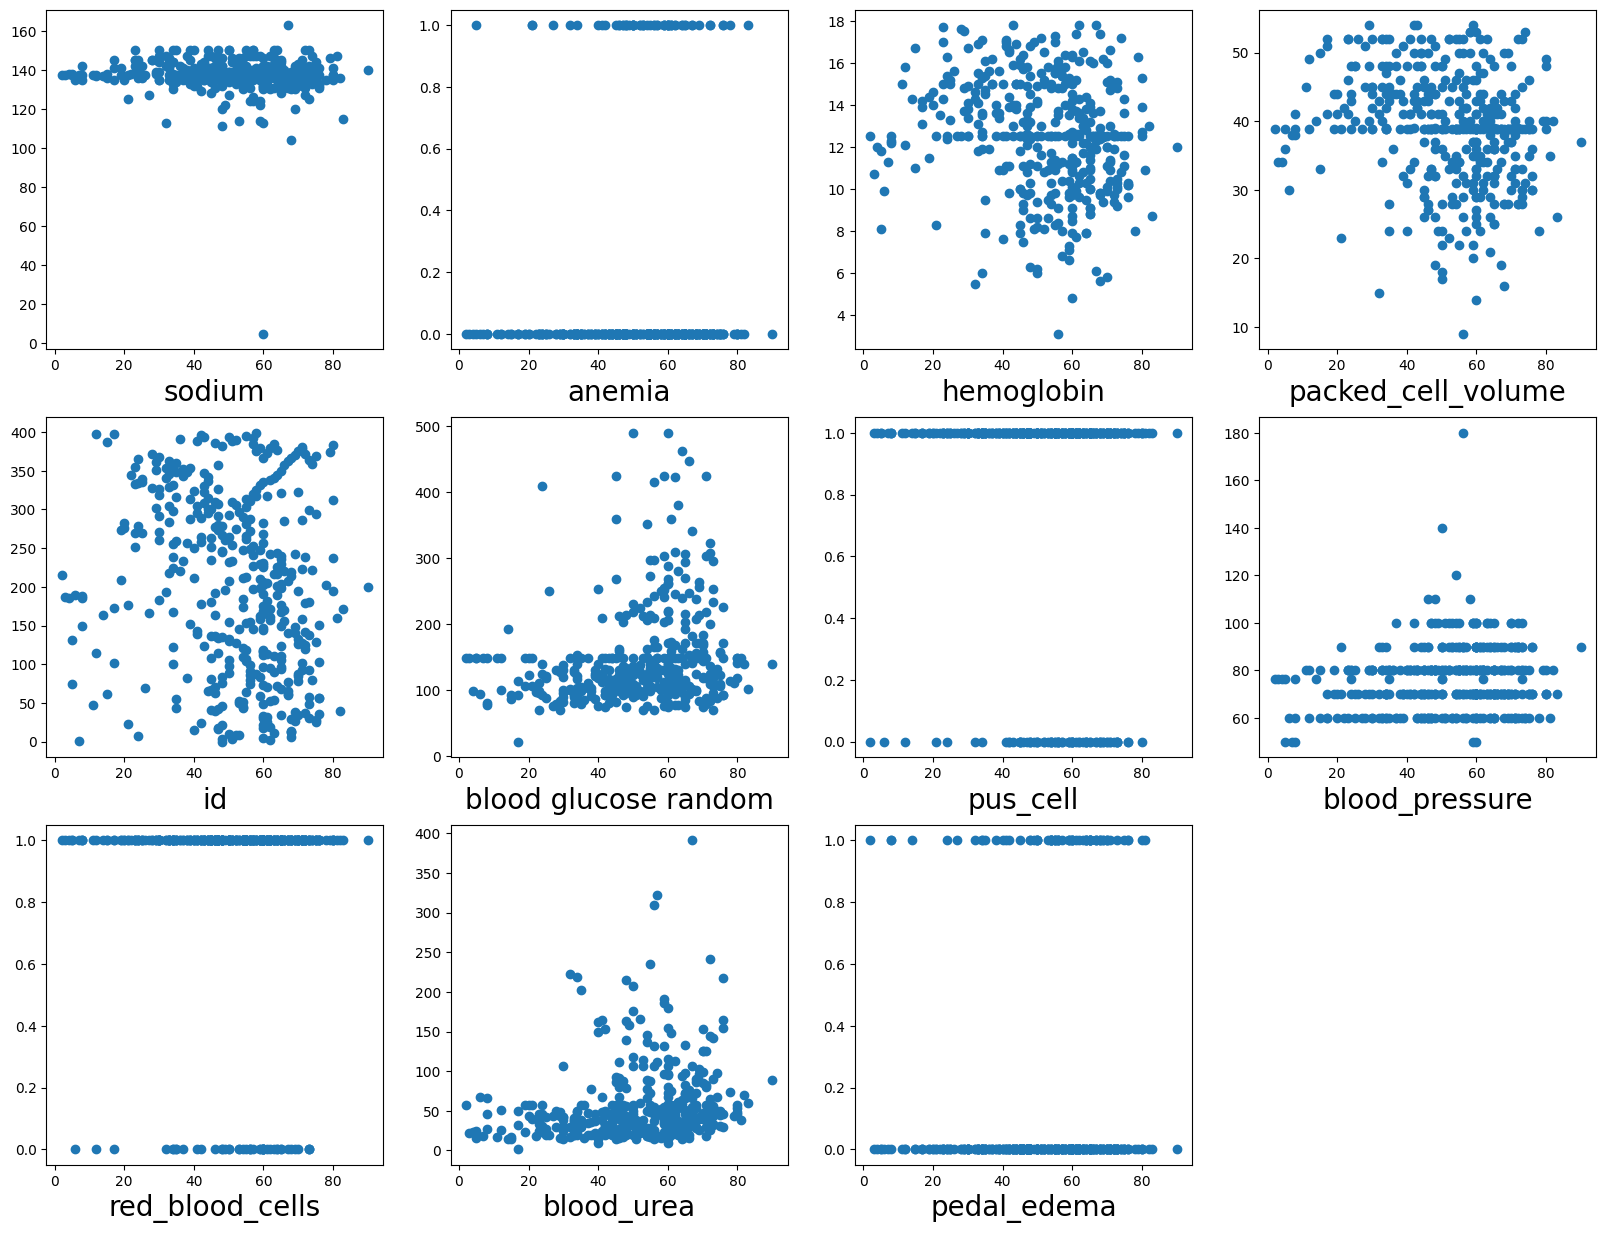

In [52]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber = 1

for column in contcols:
  if plotnumber<=11 :
    ax = plt.subplot(3,4,plotnumber)
    plt.scatter(data['age'],data[column])
    plt.xlabel(column,fontsize=20)
  plotnumber+=1
plt.show()   

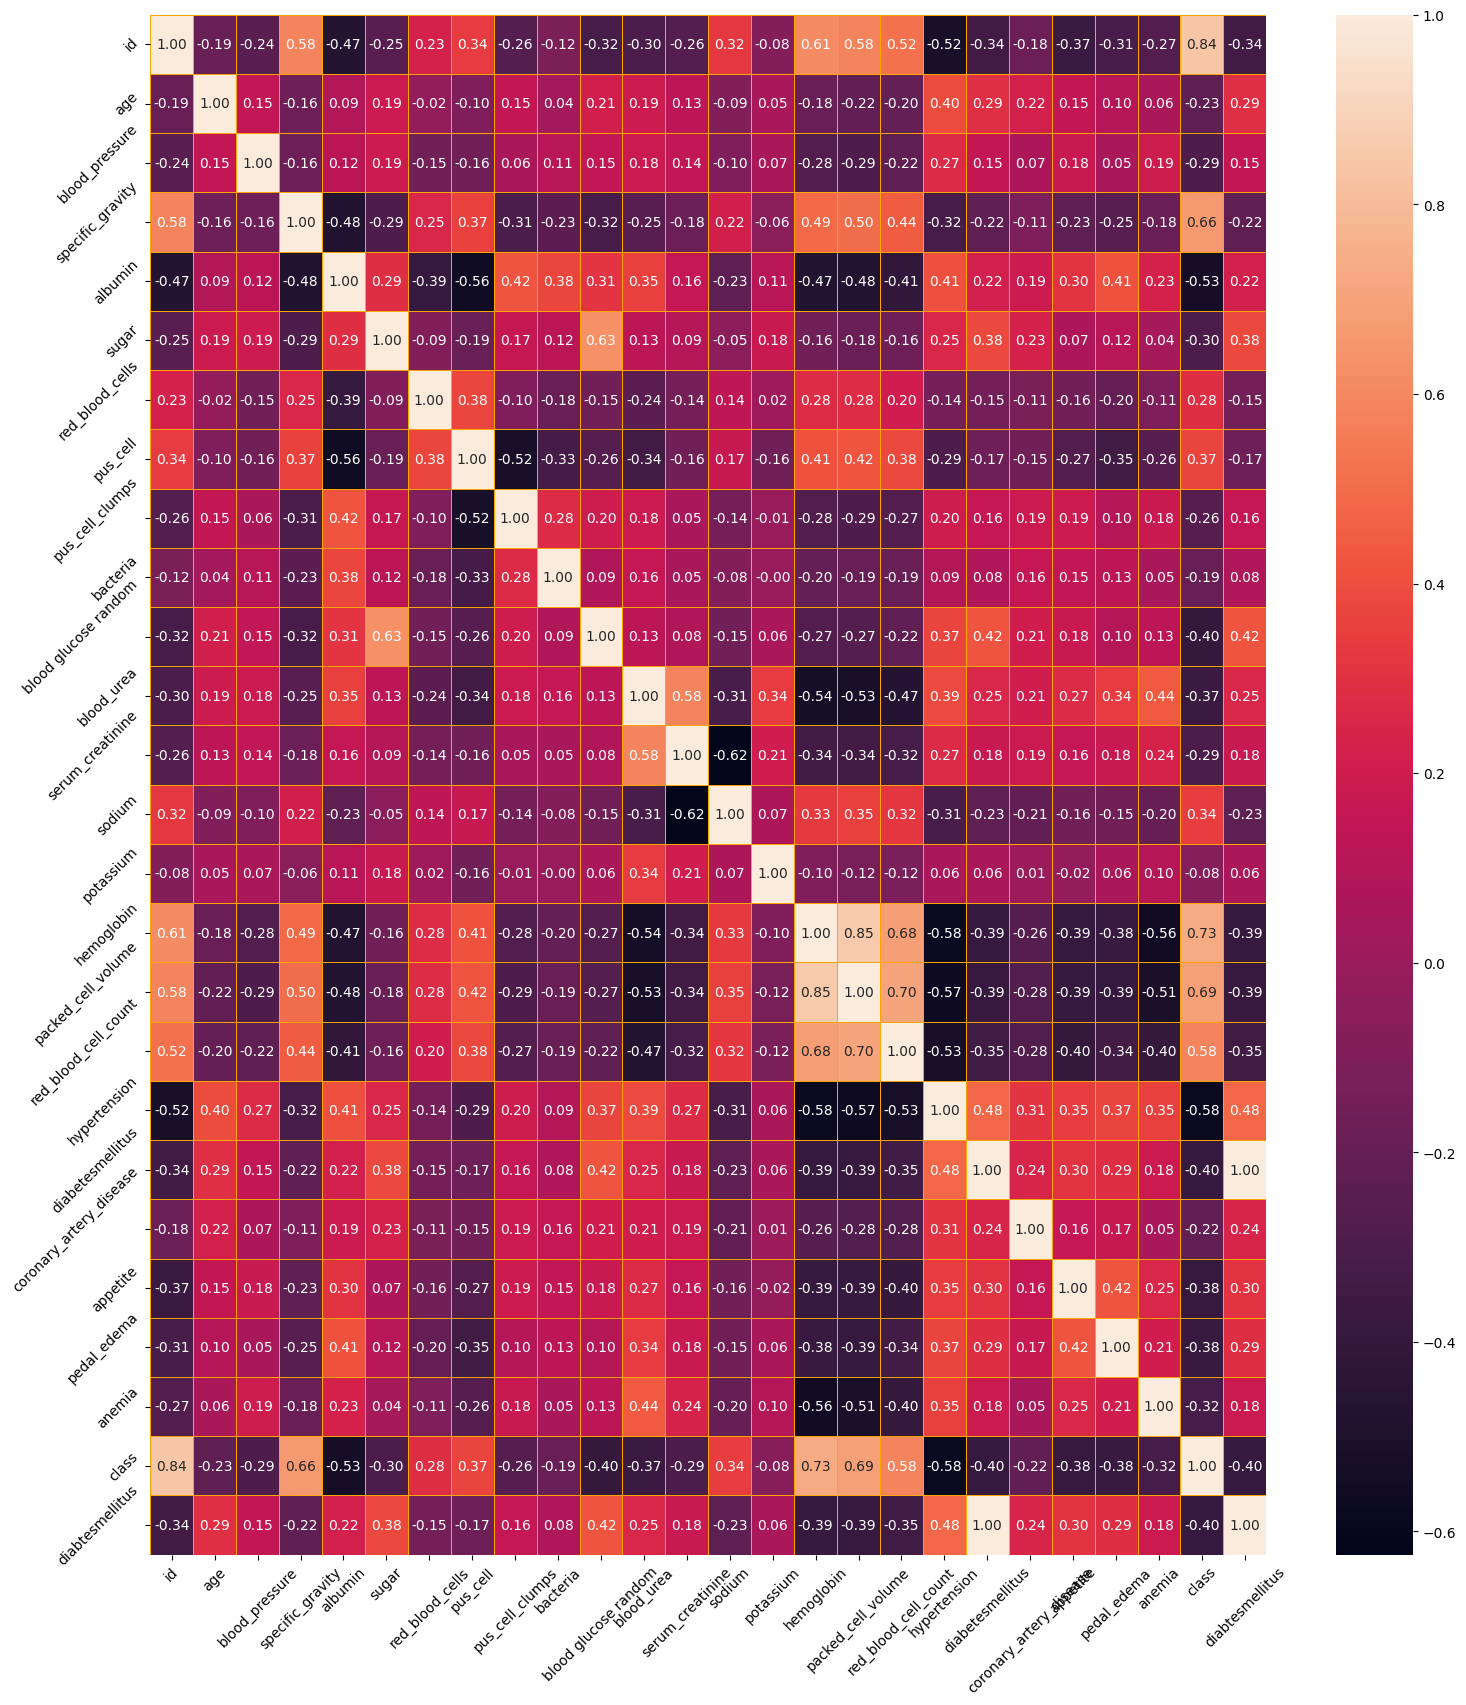

In [55]:
f,ax=plt.subplots(figsize=(18,20))
sns.heatmap(data.corr(),annot=True,fmt=".2f",ax=ax,linewidth=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

<Axes: ylabel='count'>

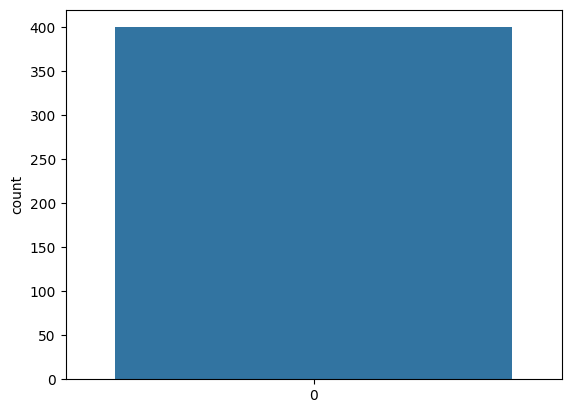

In [65]:
sns.countplot(data['class'])

In [61]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
#x_bal=sc.fit_transform(x)

In [63]:
from numpy.ma.core import shape
selcols=['red_blood_cells','pus_cell','blood glucose random','blood_urea',
         'pedal_edama','anemia','diabetesmellitus','coronary_artery_disease']
x=pd.DataFrame(data,columns=selcols)
y=pd.DataFrame(data,columns=['class'])
print(x.shape)
print(y.shape)         

(400, 8)
(400, 1)


In [64]:
from sklearn.model_selection import train_test_split
x_train,xtest,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)